In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python\Practice Work\advertising (1).csv')

In [4]:
df=pd.DataFrame(df)

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
df.shape

(200, 4)

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### This dataset is clean

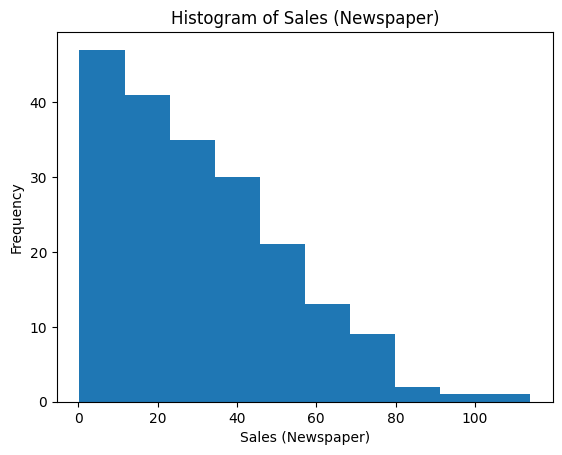

In [15]:
plt.hist(df["Newspaper"])
plt.xlabel("Sales (Newspaper)")
plt.ylabel("Frequency")
plt.title("Histogram of Sales (Newspaper)")
plt.show()

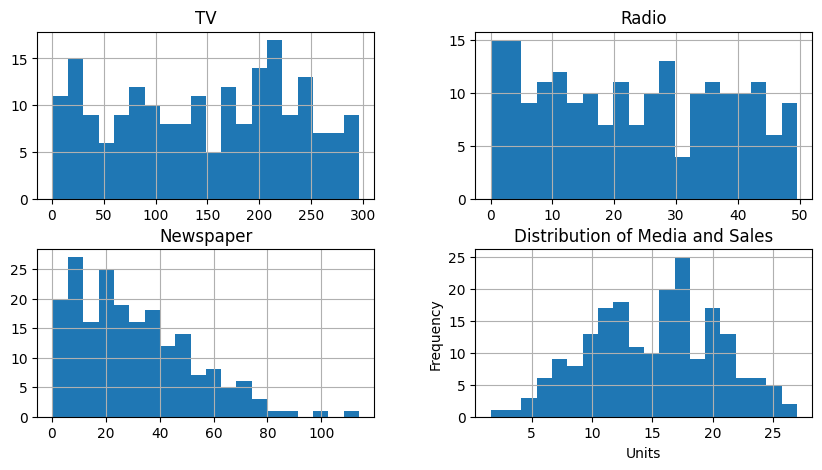

In [16]:
# Assuming the given data is in a pandas dataframe named df
df.hist(column=['TV', 'Radio', 'Newspaper', 'Sales'], bins=20, figsize=(10, 5))
plt.title('Distribution of Media and Sales')
plt.xlabel('Units')
plt.ylabel('Frequency')
plt.show()

In [18]:
def visualize_outliers(df, col):
    plt.figure(figsize=(8,6))
    df.boxplot([col])
    plt.show()


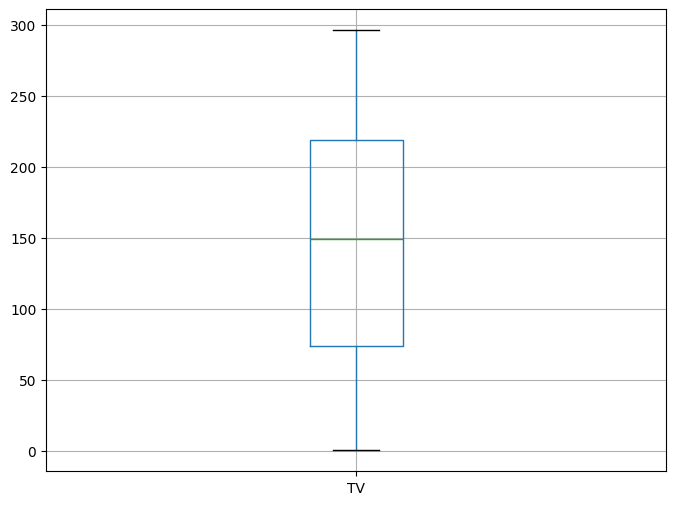

In [19]:
visualize_outliers(df, 'TV')

In [20]:
def scatter_plot(df, x, y):
    plt.figure(figsize=(8,6))
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Scatter Plot: {} vs {}'.format(x, y))
    plt.show()



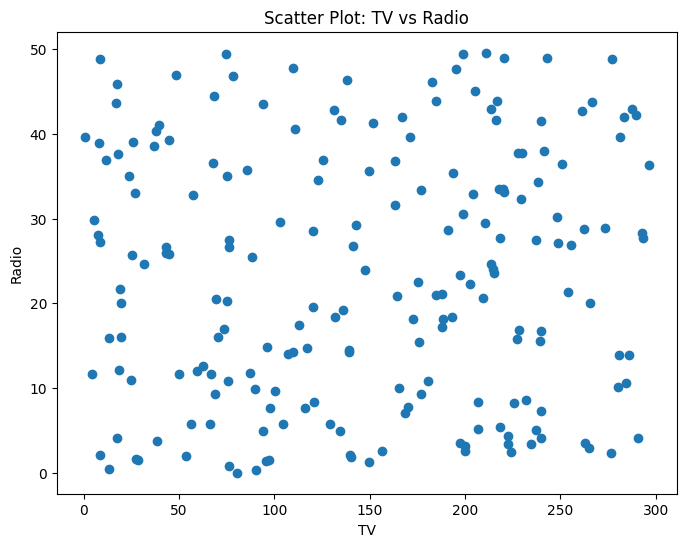

In [21]:
scatter_plot(df, 'TV', 'Radio')

In [35]:
X = df['Newspaper'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)



LinearRegression()

In [41]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)

Mean Squared Error:  22.448939159682645


In [43]:

from sklearn.metrics import r2_score

In [44]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

R^2 Score:  -0.14457363289935854


Text(0.5, 1.0, 'Sales Prediction (R^2 = -0.14)')

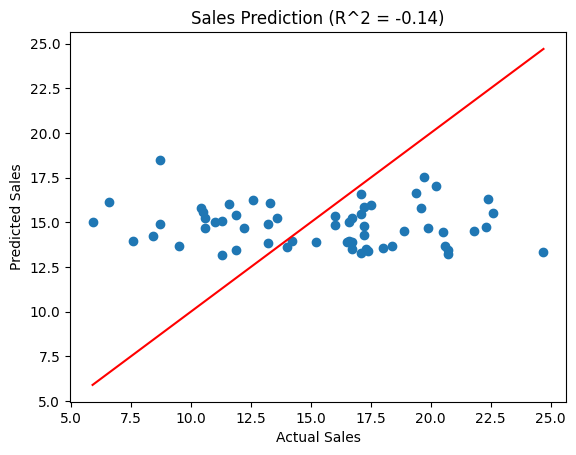

In [46]:

plt.scatter(y_test, y_pred)
min_y = min(y_test.min(), y_pred.min())
max_y = max(y_test.max(), y_pred.max())
plt.plot([min_y, max_y], [min_y, max_y], 'r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Sales Prediction (R^2 = {:.2f})'.format(r2))


In [47]:

plt.show()